In [1]:
# STEP 1: UNZIP AND IMPORT LIBRARIES
import zipfile, os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# Unzip the dataset
zip_path = "/content/handgesture.zip"  # adjust path if needed
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/handgesture_data")

data_dir = "/content/handgesture_data"
print("Files unzipped and ready.")

Files unzipped and ready.


In [3]:
# STEP 2: DATA LOADING & PREPROCESSING
img_size = 64
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [4]:
# STEP 3: DEFINE SIMPLE CNN MODEL
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,410 (6.20 MB)

 Trainable params: 1,625,410 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
import os

for root, dirs, files in os.walk("/content/handgesture_data"):
    level = root.replace("/content/handgesture_data", "").count(os.sep)
    indent = " " * 4 * (level)
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for f in files[:5]:  # Show only first 5 files per folder
        print(f"{subindent}{f}")


handgesture_data/
    sign_mnist_test.csv
    amer_sign3.png
    american_sign_language.PNG
    sign_mnist_train.csv
    amer_sign2.png
    sign_mnist_test/
        sign_mnist_test.csv
    sign_mnist_train/
        sign_mnist_train.csv


In [8]:
train_data = datagen.flow_from_directory(
    data_dir,  # make sure this now points to the folder with class folders inside
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer


In [11]:

# Load CSV files
train_df = pd.read_csv('/content/handgesture_data/sign_mnist_train.csv')
test_df = pd.read_csv('/content/handgesture_data/sign_mnist_test.csv')

# Separate labels and pixels
y_train = train_df['label']
X_train = train_df.drop('label', axis=1)

y_test = test_df['label']
X_test = test_df.drop('label', axis=1)

In [12]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape to 28x28 images
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

# One-hot encode labels
encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [15]:
# Build a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax')  # Changed to 24 units to match the number of unique labels
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 35s 39ms/step - accuracy: 0.5659 - loss: 1.5046 - val_accuracy: 0.8701 - val_loss: 0.4104
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 28s 32ms/step - accuracy: 0.9941 - loss: 0.0407 - val_accuracy: 0.8861 - val_loss: 0.3882
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 28s 32ms/step - accuracy: 0.9977 - loss: 0.0114 - val_accuracy: 0.8324 - val_loss: 0.6406
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.9942 - loss: 0.0221 - val_accuracy: 0.9113 - val_loss: 0.4190
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.9998 - loss: 9.3415e-04 - val_accuracy: 0.9136 - val_loss: 0.4147
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9986 - loss: 0.0050 - val_accuracy: 0.8938 - val_loss: 0.4436
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.9987 - loss: 0.0063 - val_accuracy: 0.9229 - val_loss: 0.4036
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 28s 32ms/step - accuracy: 1.0000 - loss: 1.664

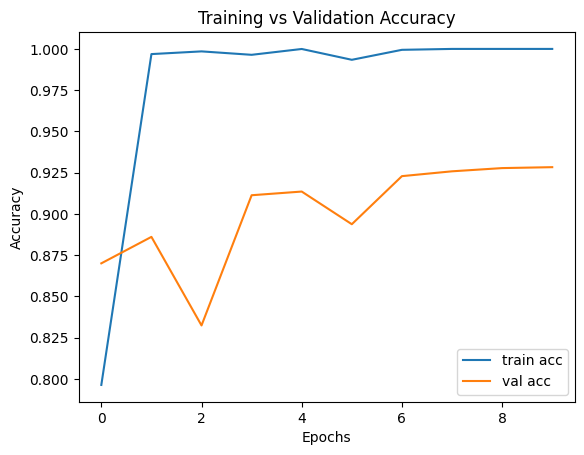

In [16]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [17]:

# STEP 6: SAVE MODEL (OPTIONAL)
model.save("hand_gesture_model.h5")

In [18]:
# Check the directory structure
for root, dirs, files in os.walk(data_dir):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print("-" * 20)

Directory: /content/handgesture_data
Subdirectories: ['sign_mnist_test', 'sign_mnist_train']
Files: ['sign_mnist_test.csv', 'amer_sign3.png', 'american_sign_language.PNG', 'sign_mnist_train.csv', 'amer_sign2.png']
--------------------
Directory: /content/handgesture_data/sign_mnist_test
Subdirectories: []
Files: ['sign_mnist_test.csv']
--------------------
Directory: /content/handgesture_data/sign_mnist_train
Subdirectories: []
Files: ['sign_mnist_train.csv']
--------------------


In [19]:
# Check unique values in the original training labels
print("Unique values in y_train before one-hot encoding:", train_df['label'].unique())
print("Number of unique values:", len(train_df['label'].unique()))

Unique values in y_train before one-hot encoding: [ 3  6  2 13 16  8 22 18 10 20 17 19 21 23 24  1 12 11 15  4  0  5  7 14]
Number of unique values: 24


In [20]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("hand_gesture_model.h5")


In [21]:
# Set up webcam
cap = cv2.VideoCapture(0)
img_size = 28  # Model expects 28x28 input

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Draw a square ROI where user shows hand
    x1, y1, x2, y2 = 100, 100, 300, 300
    roi = frame[y1:y2, x1:x2]

    # Preprocess ROI
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi_resized = cv2.resize(roi_gray, (img_size, img_size))
    roi_normalized = roi_resized / 255.0
    roi_reshaped = roi_normalized.reshape(1, img_size, img_size, 1)

    # Predict gesture
    predictions = model.predict(roi_reshaped)
    class_id = np.argmax(predictions)
    confidence = np.max(predictions)

    # Map class_id to letter (A-Y skipping J)
    class_map = [chr(i) for i in range(65, 91) if i != 74]  # A-Z excluding J
    predicted_letter = class_map[class_id]

    # Display
    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(frame, f"{predicted_letter} ({confidence:.2f})", (x1, y1-10),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    cv2.imshow("Hand Gesture Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [25]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from IPython.display import Image
import cv2
import numpy as np
import PIL.Image
import io

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '📸 Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      div.remove();

      return canvas.toDataURL('image/jpeg', quality);
    }
    takePhoto(%s);
  ''' % quality)

  display(js)
  data = eval_js("takePhoto({})".format(quality))
  binary = io.BytesIO(base64.b64decode(data.split(',')[1]))
  image = PIL.Image.open(binary)
  image.save(filename)
  return filename


In [27]:
import base64
from tensorflow.keras.models import load_model

# Load model (make sure you trained and saved it as this name)
model = load_model("hand_gesture_model.h5")

# Take photo
filename = take_photo()

# Load and preprocess image
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))  # Match your model input size
img = img / 255.0
img = img.reshape(1, 28, 28, 1)

# Predict
prediction = model.predict(img)
class_idx = np.argmax(prediction)

# Map prediction to gesture
class_map = [chr(i) for i in range(65, 91) if i != 74]  # A-Z except J
print(f"Predicted gesture: {class_map[class_idx]}")


<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Predicted gesture: M
